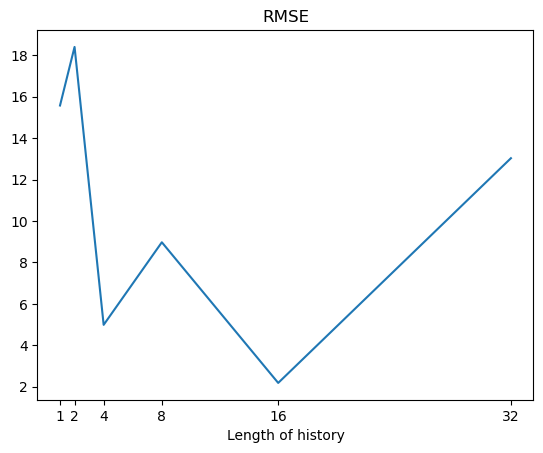

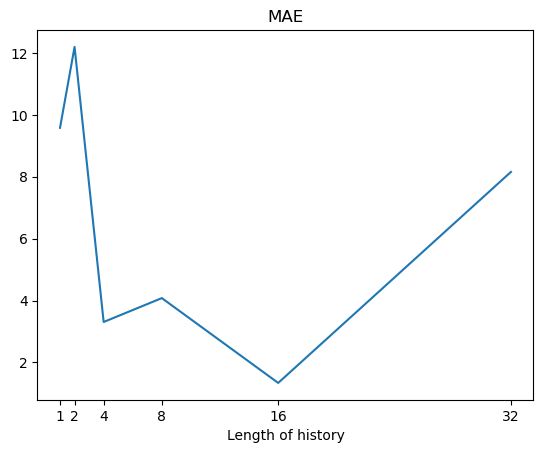

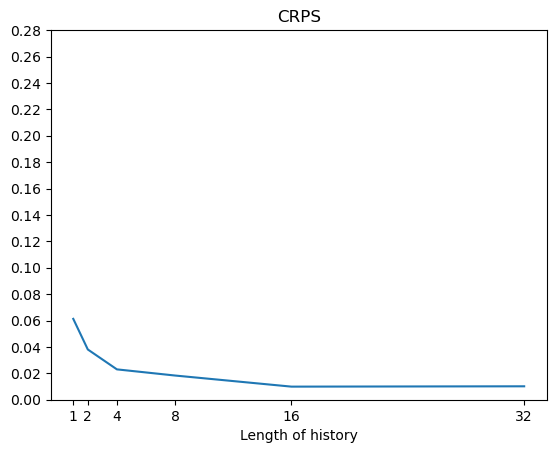

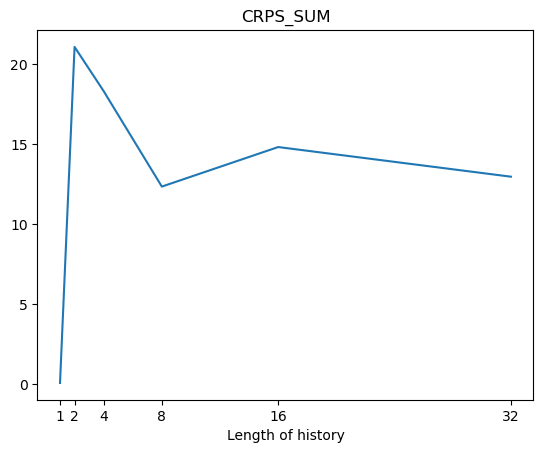

In [10]:
import pathlib
import matplotlib.pyplot as plt

hist_dict = {}
for path in pathlib.Path('save/feat_select_random/').rglob('*.txt'):
    hist_len = int(str(path.parent.parent).split('_')[-1])
    with open(path) as f:
        lines = f.readlines()
        if hist_len not in hist_dict:
            hist_dict[hist_len] = {'rmse': [], 'mae': [], 'crps': [], 'crps_sum': []}
        hist_dict[hist_len]['rmse'].append(float(lines[0].split()[-1]))
        hist_dict[hist_len]['mae'].append(float(lines[1].split()[-1]))
        hist_dict[hist_len]['crps'].append(float(lines[2].split()[-1]))
        hist_dict[hist_len]['crps_sum'].append(float(lines[3].split()[-1]))

len_accmlr = []
rmse_accmlr = []
mae_accmlr = []
crps_accmlr = []
crps_sum_accmlr = []

for k,v in sorted(hist_dict.items(), key=lambda x: int(x[0])):
    len_accmlr.append(k)
    rmse_accmlr.append(sum(v['rmse'])/len(v['rmse']))
    mae_accmlr.append(sum(v['mae'])/len(v['mae']))
    crps_accmlr.append(sum(v['crps'])/len(v['crps']))
    crps_sum_accmlr.append(sum(v['crps_sum'])/len(v['crps_sum']))

fig, axs = plt.subplots()
axs.plot(len_accmlr, rmse_accmlr, label='RMSE')
axs.set_title('RMSE')
axs.set_xlabel('Length of history')
axs.set_xticks(len_accmlr)
plt.savefig('plots/hist_len_expr_rmse.png')

fig, axs = plt.subplots()
axs.plot(len_accmlr, mae_accmlr, label='MAE')
axs.set_title('MAE')
axs.set_xlabel('Length of history')
axs.set_xticks(len_accmlr)
plt.savefig('plots/hist_len_expr_mae.png')

fig, axs = plt.subplots()
axs.plot(len_accmlr, crps_accmlr, label='CRPS')
axs.set_title('CRPS')
axs.set_xlabel('Length of history')
axs.set_xticks(len_accmlr)
axs.set_yticks([i/50 for i in range(15)])
plt.savefig('plots/hist_len_expr_crps.png')

fig, axs = plt.subplots()
axs.plot(len_accmlr, crps_sum_accmlr, label='CRPS_SUM')
axs.set_title('CRPS_SUM')
axs.set_xlabel('Length of history')
axs.set_xticks(len_accmlr)
# axs.set_yticks([i/50 for i in range(15)])
plt.savefig('plots/hist_len_expr_crps_sum.png')